<p>
Homework: https://work.caltech.edu/homework/hw7.pdf
<p>

&#x2714;
Answers:
1. d &#x2714;
2. e &#x2714;
3. d &#x2714;
4. d &#x2714;
5. b &#x2714;
6. d &#x2714;
7. e
8. 
9. 
10. 

<p>
Answer key: https://work.caltech.edu/homework/hw7_sol.pdf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [3]:
# Questions 1 through 5
# training set: http://work.caltech.edu/data/in.dta
# test set: http://work.caltech.edu/data/out.dta
train = pd.read_fwf('http://work.caltech.edu/data/in.dta', header=None)
train_x = train.iloc[:, :2]
train_y = train.iloc[:, 2]

test = pd.read_fwf('http://work.caltech.edu/data/out.dta', header=None)
test_x = test.iloc[:, :2]
test_y = test.iloc[:, 2]

In [4]:
def transform(x):
    x1 = x.iloc[:, 0]
    x2 = x.iloc[:, 1]
    
    z = pd.DataFrame(np.ones(len(x)))
    z.loc[:, 1] = x1
    z.loc[:, 2] = x2
    z.loc[:, 3] = x1 ** 2
    z.loc[:, 4] = x2 ** 2
    z.loc[:, 5] = x1 * x2
    z.loc[:, 6] = np.abs(x1 - x2)
    z.loc[:, 7] = np.abs(x1 + x2)
    return z

In [5]:
train_z = transform(train_x)
test_z = transform(test_x)

In [6]:
from numpy.linalg import inv
def linear_regression(Z, y):
    Z_T_Z = np.dot(Z.T, Z)
    Z_T_Z_inverse = inv(Z_T_Z)
    Z_dagger = np.dot(Z_T_Z_inverse, Z.T)
    weights = np.dot(Z_dagger, y)
    return weights

In [7]:
def error(W, X, y):
    misclassified = np.sign(np.dot(X, W)) != y
    return 1.0 * misclassified.sum()/len(misclassified)

In [8]:
def calc_error(X, y, X_val, y_val, X_test, y_test):
    weights = linear_regression(X, y)
    print "train   ", np.round(error(weights, X, y), 8)
    print "validate", np.round(error(weights, X_val, y_val), 8)
    print "test    ", np.round(error(weights, X_test, y_test), 8)

In [9]:
train_set_size = 25

z_train = train_z.head(train_set_size)
y_train = train_y.head(train_set_size)

z_validate = train_z.tail(len(train_z) - train_set_size)
y_validate = train_y.tail(len(train_z) - train_set_size)

z_test = test_z
y_test = test_y

In [10]:
for k in [3, 4, 5, 6, 7]:
    print "Trying k: ", k
    calc_error(z_train.ix[:,0:k], y_train, 
               z_validate.ix[:,0:k], y_validate,
               z_test.ix[:,0:k], y_test)

Trying k:  3
train    0.44
validate 0.3
test     0.42
Trying k:  4
train    0.32
validate 0.5
test     0.416
Trying k:  5
train    0.08
validate 0.2
test     0.188
Trying k:  6
train    0.04
validate 0.0
test     0.084
Trying k:  7
train    0.04
validate 0.1
test     0.072


In [11]:
for k in [3, 4, 5, 6, 7]:
    print "Trying k: ", k
    calc_error(z_validate.ix[:,0:k], y_validate,
               z_train.ix[:,0:k], y_train, 
               z_test.ix[:,0:k], y_test)

Trying k:  3
train    0.4
validate 0.28
test     0.396
Trying k:  4
train    0.3
validate 0.36
test     0.388
Trying k:  5
train    0.2
validate 0.2
test     0.284
Trying k:  6
train    0.0
validate 0.08
test     0.192
Trying k:  7
train    0.0
validate 0.12
test     0.196


In [12]:
#Question 6

N=1000
e1 = np.random.uniform(size=N)
e2 = np.random.uniform(size=N)
e = np.minimum(e1, e2)

print np.mean(e1), np.mean(e2), np.mean(e)

0.509935119651 0.492465978452 0.333857940287


Predicted function found in 134 iterations, that performed at 99.19% accuracy on out of sample data set


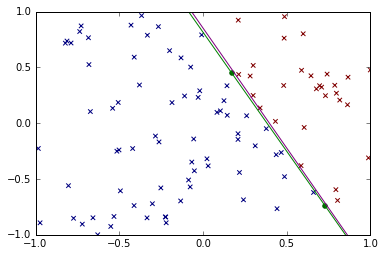

In [30]:
# Questions 8 through 10

from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'])

class Line:
    def __init__(self, weights=None, points=None):
        if (weights is None and points is None) or (weights is not None and points is not None):
            raise ValueError("Either weights or points, but only one of them, must be provided to specify the line")
        if weights is not None:
            assert len(weights) == 3
            w0, w1, w2 = weights
            w0 /= w2
            w1 /= w2
            self.intercept = -w0
            self.slope = -w1
        else:
            assert len(points) >= 2
            self.slope = (points[1].y-points[0].y)/(points[1].x-points[0].x)
            self.intercept = points[0].y - self.slope * points[0].x
    
    def get_y(self, x):
        return self.intercept + self.slope * x
    
    def get_sign(self, x, y):
        return np.sign(- self.intercept - self.slope*x + y )
    
    def get_weights(self):
        return np.array([-self.intercept, -self.slope, 1])

def make_target_function(plot=False, x_min=-1, x_max=1, y_min=-1, y_max=1):
    x1_s = list(np.random.uniform(x_min, x_max, size=2))
    x2_s = list(np.random.uniform(y_min, y_max, size=2))
    points = [Point(x1_s[i], x2_s[i]) for i in range(len(x1_s))]
    target_function = Line(points=points)
    if plot:
        plt.axis([x_min, x_max, y_min, y_max])
        plt.scatter(x1_s, x2_s, color='#006400')
        plt.plot([x_min, x_max], [target_function.get_y(x_min), target_function.get_y(x_max)], color='green')
    return target_function

def generate_samples(target_function, N, plot=False, x_min=-1, x_max=1, y_min=-1, y_max=1):
    x1_s = list(np.random.uniform(x_min, x_max, size=N))
    x2_s = list(np.random.uniform(y_min, y_max, size=N))
    y_s = [target_function.get_sign(x1, x2) for x1, x2 in zip(x1_s, x2_s)]
    if plot:
        plt.axis([x_min, x_max, y_min, y_max])
        plt.scatter(x1_s, x2_s, c=y_s, marker='x')
    X = np.array([np.ones(N), x1_s, x2_s]).transpose()
    y = np.array(y_s)
    return X, y

def PLA(X, y, initial_weights, plot=False, max_iterations = 15000, verbose=False):
    w = initial_weights.copy()
    iter = 0
    while iter < max_iterations:
        if verbose:
            print "Iteration {} w {}".format(iter, w)
        predictions = np.sign(np.dot(X, w))
        misclassfied = predictions != y
        num_misclassified = np.sum(misclassfied)
        if num_misclassified == 0:
            break
        if verbose:
            print "Still misclassified: {}".format(num_misclassified)
        chosen = np.random.choice(np.where(misclassfied)[0])
        w += X[chosen] * y[chosen]
        iter += 1
    if verbose:
        print "Returning iter {}".format(iter)
        print
    return (iter+1 if iter < max_iterations else None, w)

def score(target_function, predicted_function, large_N=10000, x_min=-1, x_max=1, y_min=-1, y_max=1):
    test_sample_x1 = list(np.random.uniform(x_min, x_max, size=large_N))
    test_sample_x2 = list(np.random.uniform(y_min, y_max, size=large_N))
    test_sample_y = [target_function.get_sign(x1, x2) for x1, x2 in zip(test_sample_x1, test_sample_x2)]
    test_sample_y_pred = [predicted_function.get_sign(x1, x2) for x1, x2 in zip(test_sample_x1, test_sample_x2)]
    return 1.0 * np.sum(np.array(test_sample_y) == np.array(test_sample_y_pred))/len(test_sample_y)

def PLA_experiment(N, plot=False, x_min=-1, x_max=1, y_min=-1, y_max=1):
    target_function = make_target_function(plot)
    X, y = generate_samples(target_function, N, plot)
    num_iter, w = PLA(X, y, np.array([0., 0., 0.]))
    predicted_function = Line(weights=w)
    if plot:
        plt.plot([x_min, x_max], [predicted_function.get_y(x_min), predicted_function.get_y(x_max)], color='purple')
    accuracy = score(target_function, predicted_function)
    return (num_iter, accuracy)

iters, accuracy = PLA_experiment(N=100, plot=True)
print "Predicted function found in {} iterations, that performed at {}% accuracy on out of sample data set".format(iters, accuracy*100)